In [ ]:
import pandas as pd

data = pd.read_csv('accounts.csv', usecols= list(range(8)))
df = data.drop_duplicates().dropna()
print(df.head())
X = pd.get_dummies(df, drop_first = True, dtype=float).reset_index()
X = X.drop(['index'], axis='columns')
X

   age         job  marital  education default  balance housing loan
0   59      admin.  married  secondary      no     2343     yes   no
1   56      admin.  married  secondary      no       45      no   no
2   41  technician  married  secondary      no     1270     yes   no
3   55    services  married  secondary      no     2476     yes   no
4   54      admin.  married   tertiary      no      184      no   no


,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,59,2343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,56,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,41,1270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,55,2476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,54,184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,34,-72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
10312,33,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10313,39,733,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10314,32,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
scaled_df

array([[0.53246753, 0.10437133, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49350649, 0.07827282, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2987013 , 0.09218521, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.27272727, 0.08608647, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.07809111, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32467532, 0.07776175, 0.        , ..., 0.        , 0.        ,
        1.        ]])

[17617.000494708715, 16045.499796834425, 13848.350818936622, 12983.509778971147, 11733.378745824704, 11335.70423471298, 10524.882858249744]


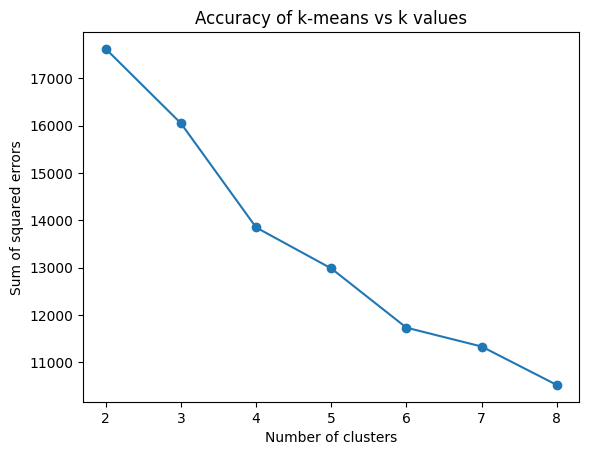

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
n_clusters = [2,3,4,5,6,7,8]
sse = []
for k in n_clusters:
  kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42).fit(scaled_df)
  sse.append(kmeans.inertia_)

print(sse)
plt.plot(n_clusters, sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.title("Accuracy of k-means vs k values")
plt.show()


#b)
 By analyzing our plot, we can see that there are significant drops in the SSE from 2 to 3(\~1600) and 3 to 4(\~2200) clusters, but from then on the changes aren't as significant(4 to 5 has a difference of around 865). This can indicate that 4 could be an ideal number of customer segments, considering that even though more clusters get lower errors, they are also costlier to compute, and the benefits aren't as significant.

#c)
The 8 features selected were split into numerical: age and balance, categorical: marital status, education and job, and binary: housing, loan and default.\
After applying pandas' get_dummies() function, we get a dataframe with the same 2 numerical features and 19 binary features.\
The algorithms mentioned, k-means and k-modes operate differently, and they handle some data types better than others. K-means calculates distances to the centroid of the clusters using Euclidian distances, which assumes a numerical feature space. Therefore, it may identify a continuous relation between binary features, instead of checking if they match or not.
However, the K-modes approach is better for categorical and binary data, as it calculates distances using the number of mismatches, similarly to Hamming distance. This method should yield more significant clusters, because it doesn't presume binary features to be continuous, so it doesn't misinterpret the distance between points, unlike the k-means approach.
Based on the predominance of binary features in our data, a k-modes approach would likely result in more meaningful clusters, which respect the nature of our binary data.

# 2

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaled_df = std_scaler.fit_transform(X)
std_scaled_df

array([[ 1.52629472,  0.26851153, -0.47023125, ..., -0.12866618,
         1.02215304, -0.4001799 ],
       [ 1.27032008, -0.47002384, -0.47023125, ..., -0.12866618,
        -0.97832709, -0.4001799 ],
       [-0.00955314, -0.07633114, -0.47023125, ..., -0.12866618,
         1.02215304, -0.4001799 ],
       ...,
       [-0.18020291, -0.24891316, -0.47023125, ..., -0.12866618,
        -0.97832709, -0.4001799 ],
       [-0.77747708, -0.47516595, -0.47023125, ..., -0.12866618,
        -0.97832709, -0.4001799 ],
       [ 0.16109662, -0.48448602, -0.47023125, ..., -0.12866618,
        -0.97832709,  2.49887615]])

# 2 a)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(std_scaled_df)

explained_variance = pca.explained_variance_ratio_
total_variance_explained = explained_variance.sum()
print("Variance explained by the top 2 components:", total_variance_explained)

Variance explained by the top 2 components: 0.22755012102819194


# 2 b)

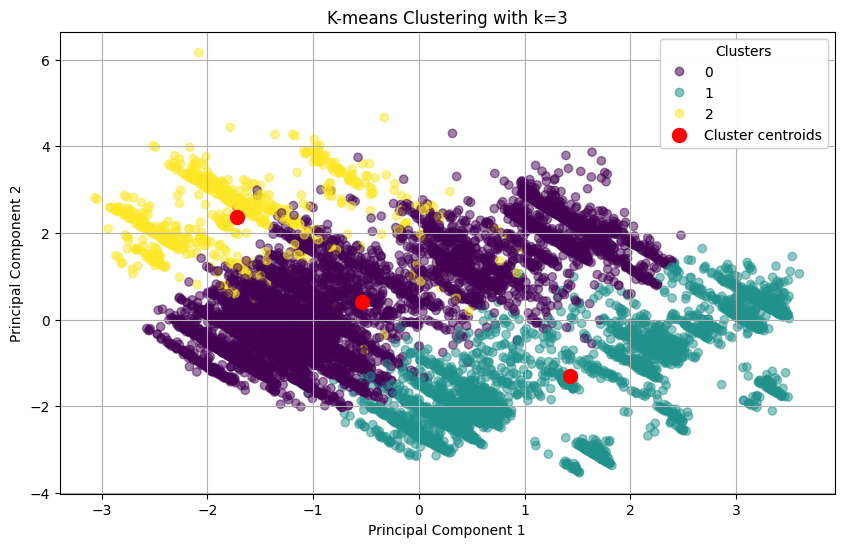

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(std_scaled_df)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
pcadata = pca.fit_transform(std_scaled_df)

pca_centers = pca.transform(centers)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pcadata[:, 0], pcadata[:, 1], c=labels, cmap='viridis', alpha=0.5)
centroid_handle = plt.scatter(pca_centers[:, 0], pca_centers[:, 1], color='red', marker='o', s=100, label='Cluster centroids')
plt.title('K-means Clustering with k=3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
handle, label = scatter.legend_elements()
leg = plt.legend(handle + [centroid_handle], label + ['Cluster centroids'], title="Clusters")
plt.gca().add_artist(leg)


plt.grid()
plt.show()

# 2 c)

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
cluster                                                                      
0           792         1432           267        223        1532        0   
1           443          436            49         35         771        0   
2             0            0             0          0           0      690   

job      self-employed  services  student  technician  unemployed  unknown  
cluster                                                                     
0                  242       592       12        1038         208       48  
1                  135       291      296         652         115       17  
2                    0         0        0           0           0        0  


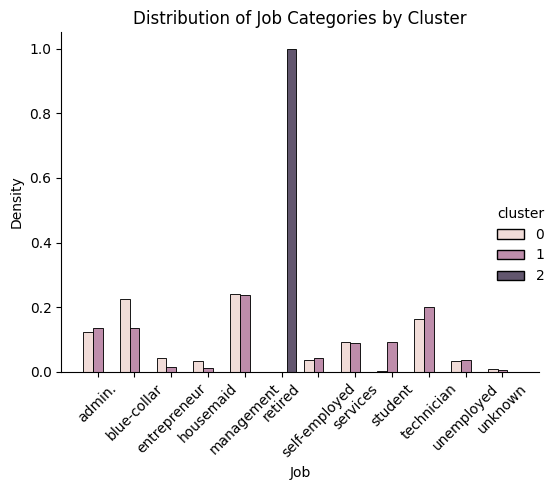

education  primary  secondary  tertiary  unknown
cluster                                         
0             1014       3231      1870      271
1              181       1595      1318      146
2              250        278       122       40


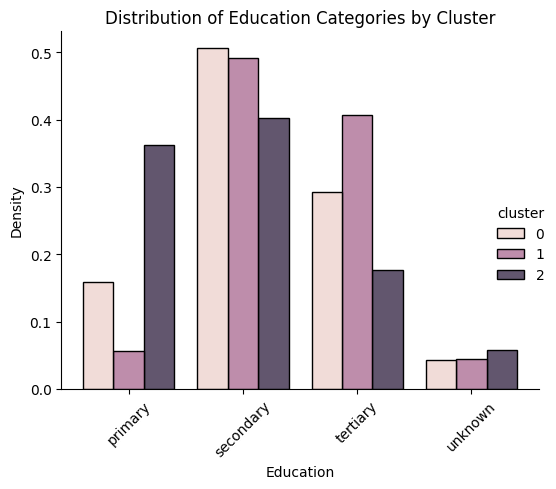

In [ ]:
import seaborn as sns
feature_names = X.columns

df['cluster'] = labels

job = df.groupby(['cluster','job']).size().unstack(fill_value=0)
print(job)

job = job.reset_index().melt(id_vars='cluster',var_name = 'job', value_name='frequency')

sns.displot(
    data=job,
    x="job",
    hue="cluster",
    weights='frequency',
    multiple="dodge",
    stat="density",
    shrink=0.8,
    common_norm=False
)
plt.title('Distribution of Job Categories by Cluster')
plt.xlabel('Job')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

edu = df.groupby(['cluster','education']).size().unstack(fill_value=0)
print(edu)

edu = edu.reset_index().melt(id_vars='cluster',  var_name='education', value_name='frequency')

sns.displot(
    data=edu,
    x="education",
    hue="cluster",
    weights='frequency',
    multiple="dodge",
    stat="density",
    shrink=0.8,
    common_norm=False
)
plt.title('Distribution of Education Categories by Cluster')
plt.xlabel('Education')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
